C:\Users\sonip\AppData\Local\Temp\ipykernel_19804\350098549.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da['job_skills']=df_da['job_skills'].apply(lambda x: ast.literal_eval(x))


<Axes: xlabel='month_name'>

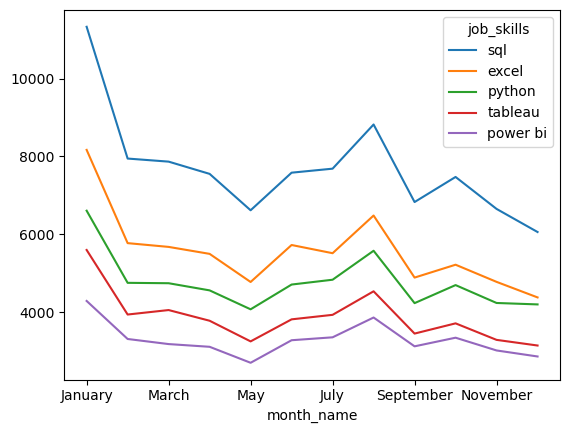

In [ ]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

title = input("Enter the job title to filter by (e.g., 'Data Scientist'): ")
head_count=int(input("Enter the minimum head count (e.g., 10): "))

df['month_name']=df['job_posted_date'].dt.month_name()
df_req= df[df['job_skills'].notna()]
df_da= df_req[df_req['job_title_short']==title]

import ast
df_da['job_skills']=df_da['job_skills'].apply(lambda x: ast.literal_eval(x))

df_da_exp=df_da.explode('job_skills')
df_da_pt= df_da_exp.pivot_table(index='month_name',columns='job_skills',aggfunc='size',fill_value=0)

# top_skills = df_da_exp.groupby('job_skills').size().sort_values(ascending=False).head(head_count).index
# df_da_pt.loc[:,top_skills].reindex(['January', 'February', 'March', 'April', 'May', 'June',
#                                     'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='line')


In [3]:
df_da_pt

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_name,,,,,,,,,,,,,,,,,,,,,
April,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
August,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
December,144,10,274,28,0,13,0,8,11,9,...,6,139,8,786,3,5,0,0,2,37
February,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
January,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
July,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
June,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
March,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
